#           How to Choose the Best Location in London to start an Indian Restaurant?

# Introduction/Business Problem

Of course, food and facility are significant to the success of a restaurant, but the location can be just as crucial, especially in the early years. Not all locations are suitable for opening a restaurant. It all depends on the style of restaurant, the neighborhood, the targeted customers, amenities, competitors. If these things are clear in one’s mind then they will be able to choose the best location to open up their business with good results. There are many things to keep in mind while opening a restaurant of your choice. The following points need to be considered before the business idea is put into action:

1. The style of the restaurant
        Does it focus on a specific cuisine?
        How do you want the service to be: self-service or table service?
        How should be the ambience: casual, fine-dining, or high-end?
2. The target customers
        To start an Indian restaurant in London, one needs to know the pulse of customers: age group, their tastes, the amount they are willing to spend, are we 
        focusing just on just Indians, or other Asians
3. Competition
        Another main point to consider is the competitors nearby. How well they are doing their business. 
        What kind of restaurants they are running. Their positives and negatives. 
        How are they attracting their customers? It will be highly competitive if there are similar restaurants in the nearby locations. 
        It is better to look for area where there is less choices and high demand.
4. Menu
            It is the heart of the restaurant. It is where everything else can be compromised. India being a hub for variety of food from north to south;  
            please customers from every part of India. 
5. Location
            Selecting the right location is a challenging tasks of all. Many factors needs to be considered and compromised before you fix the location, like:
                	Accessibility
                	Parking facility: If the restaurant is located at place where the public transport is less assessable, you have to check parking facilities. 
                    If customers have to walk a fair distance to get to your restaurant, they may opt to go somewhere else "more convenient."
                	Cost
                	Building type and size

# Data

British Indians form the largest ethno-national group in London with a population of around 542,857 or 6.6% of the population, making them the single largest visible ethnic minority population in the country.

The London boroughs are the 32 local authority districts that make up Greater London. The London boroughs have populations of around 150,000 to 300,000. Inner London boroughs tend to be smaller, in both population and area, and more densely populated than Outer London boroughs. This will be focus for solving the restaurant problems.

To solve the problem we need datasets based on:
•	The target audience: Age, Gender, Marital status, Employment status, Income
•	Existing Restaurants in each boroughs
•	Rateable Value Statistics for Commercial and Industrial Floorspace
•	Tourism spend estimates as well as domestic spend estimates

These data can be freely obtained from London Datastore (https://data.london.gov.uk/) in csv and xls format. And Foursquare location data is also used.

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from bs4 import BeautifulSoup

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be 

### Read the "Ethnic group by borough" data into a Pandas DataFrame

In [28]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_983fa272d0f1495cb009f3f8f9533627 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='lUmIgWrDSzZeT3zRLZyNuddlDqVUvQbbunxJPEcqau1j',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_983fa272d0f1495cb009f3f8f9533627.get_object(Bucket='capstoneproject-donotdelete-pr-lefewxdvmumkwk',Key='asian_population.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()


,Code,Borough,2018,2017,2016,2015,2014,2013,2012
0,E09000001,City of London,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,54000.0,48000.0,41000.0,41000.0,33000.0,32000.0,27000.0
2,E09000003,Barnet,57000.0,57000.0,68000.0,54000.0,53000.0,43000.0,66000.0
3,E09000004,Bexley,17000.0,16000.0,18000.0,15000.0,10000.0,7000.0,8000.0
4,E09000005,Brent,107000.0,101000.0,106000.0,108000.0,99000.0,110000.0,109000.0


In [30]:
df_data_0.shape

(33, 9)

In [31]:
df_data_0 = df_data_0.dropna(how='any')
df_data_0.head(10)

,Code,Borough,2018,2017,2016,2015,2014,2013,2012
1,E09000002,Barking and Dagenham,54000.0,48000.0,41000.0,41000.0,33000.0,32000.0,27000.0
2,E09000003,Barnet,57000.0,57000.0,68000.0,54000.0,53000.0,43000.0,66000.0
3,E09000004,Bexley,17000.0,16000.0,18000.0,15000.0,10000.0,7000.0,8000.0
4,E09000005,Brent,107000.0,101000.0,106000.0,108000.0,99000.0,110000.0,109000.0
5,E09000006,Bromley,15000.0,26000.0,17000.0,16000.0,20000.0,20000.0,19000.0
6,E09000007,Camden,39000.0,32000.0,28000.0,27000.0,32000.0,35000.0,32000.0
7,E09000008,Croydon,70000.0,77000.0,75000.0,61000.0,48000.0,65000.0,63000.0
8,E09000009,Ealing,96000.0,113000.0,105000.0,102000.0,94000.0,109000.0,99000.0
9,E09000010,Enfield,37000.0,40000.0,36000.0,31000.0,34000.0,33000.0,37000.0
10,E09000011,Greenwich,39000.0,25000.0,43000.0,30000.0,36000.0,40000.0,32000.0


**The population data is of 7 years from 2012 to 2018. To get the current population of the Asians living in London , the mean is calculated**

In [36]:
df_popu_mean = df_data_0.mean(numeric_only=True, axis=1)
df_data_0.head()

,Borough,2018,2017,2016,2015,2014,2013,2012
Code,,,,,,,,
E09000002,Barking and Dagenham,54000.0,48000.0,41000.0,41000.0,33000.0,32000.0,27000.0
E09000003,Barnet,57000.0,57000.0,68000.0,54000.0,53000.0,43000.0,66000.0
E09000004,Bexley,17000.0,16000.0,18000.0,15000.0,10000.0,7000.0,8000.0
E09000005,Brent,107000.0,101000.0,106000.0,108000.0,99000.0,110000.0,109000.0
E09000006,Bromley,15000.0,26000.0,17000.0,16000.0,20000.0,20000.0,19000.0


**Next process is to find the Borough with highest population**

In [39]:
df_data_0.loc[df_popu_mean.idxmax()]

Borough    Newham
2018       166000
2017       144000
2016       147000
2015       128000
2014       143000
2013       146000
2012       144000
Name: E09000025, dtype: object

**From the above data it is clear that Newham borough is having highest Asian population, this borough is considered as our preferred location for the Indian restuarant.**

**Bring the Newham borough into a dataframe.**

In [41]:
df_Newham = df_data_0.loc[df_data_0['Borough'] == 'Newham']
df_Newham

,Borough,2018,2017,2016,2015,2014,2013,2012
Code,,,,,,,,
E09000025,Newham,166000.0,144000.0,147000.0,128000.0,143000.0,146000.0,144000.0


## Read the weekly earnings in each borough from London Data

In [42]:

body = client_983fa272d0f1495cb009f3f8f9533627.get_object(Bucket='capstoneproject-donotdelete-pr-lefewxdvmumkwk',Key='Earnings.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_earnings = pd.read_excel(body)
df_data_earnings.head()


,Code,Borough,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,00AB,Barking and Dagenham,383.3,354.9,360.1,375.1,417.6,446.7,449.9,448.8,429.3,452.1,450.0,441.2,422.5,436.6,462.2,461.0,479.1
1,00AC,Barnet,427.4,450.1,453.3,442.3,466.1,460.0,502.2,528.1,501.6,498.3,503.1,517.5,479.1,491.0,485.6,522.6,536.6
2,00AD,Bexley,405.0,431.9,438.1,452.4,443.4,469.8,483.9,486.3,518.1,505.1,509.1,497.9,512.6,491.1,487.0,513.0,513.8
3,00AE,Brent,368.4,359.8,395.5,394.7,398.7,421.6,437.0,439.1,423.1,414.9,442.0,441.8,441.8,457.6,467.0,471.0,480.0
4,00AF,Bromley,440.1,449.2,461.2,464.8,479.5,506.3,546.0,545.6,527.2,551.7,566.6,581.1,578.5,583.8,584.3,608.0,632.5


In [43]:
df_data_earnings.shape

(32, 19)

In [44]:
df_data_earnings=df_data_earnings.set_index(['Code'])
df_data_earnings.head()

,Borough,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Code,,,,,,,,,,,,,,,,,,
00AB,Barking and Dagenham,383.3,354.9,360.1,375.1,417.6,446.7,449.9,448.8,429.3,452.1,450.0,441.2,422.5,436.6,462.2,461.0,479.1
00AC,Barnet,427.4,450.1,453.3,442.3,466.1,460.0,502.2,528.1,501.6,498.3,503.1,517.5,479.1,491.0,485.6,522.6,536.6
00AD,Bexley,405.0,431.9,438.1,452.4,443.4,469.8,483.9,486.3,518.1,505.1,509.1,497.9,512.6,491.1,487.0,513.0,513.8
00AE,Brent,368.4,359.8,395.5,394.7,398.7,421.6,437.0,439.1,423.1,414.9,442.0,441.8,441.8,457.6,467.0,471.0,480.0
00AF,Bromley,440.1,449.2,461.2,464.8,479.5,506.3,546.0,545.6,527.2,551.7,566.6,581.1,578.5,583.8,584.3,608.0,632.5


**It was found that Newham has the highest populations of Asians, including Indians. So the next step is to find out the earnings of this particluar borough**

In [45]:
df_earnings_Newham = df_data_earnings.loc[df_data_earnings['Borough'] == 'Newham']
df_earnings_Newham

,Borough,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Code,,,,,,,,,,,,,,,,,,
00BB,Newham,338.2,343.4,371.0,383.2,390.9,390.8,403.0,421.6,422.4,382.5,369.8,387.6,393.7,421.6,436.7,471.3,479.1


## To find out how many restuarants are there in each borough

**There were categories of both licensed and unlicensed restuarants in London data, only licensed were considered for this**

In [47]:

body = client_983fa272d0f1495cb009f3f8f9533627.get_object(Bucket='capstoneproject-donotdelete-pr-lefewxdvmumkwk',Key='Restuarants.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_restuarants = pd.read_excel(body)
df_data_restuarants.head()


,Code,Borough,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,5455,5525,5540,5575,5915,5940,6175,5985,5910,6175,6210,6655,6715,7035,7515,7745,7990
1,E09000001,City of London,180,190,190,175,180,170,205,185,180,195,190,205,230,255,270,270,295
2,E09000002,Barking and Dagenham,30,30,30,35,35,35,35,35,30,30,30,40,40,35,45,40,35
3,E09000003,Barnet,205,195,200,200,200,200,205,195,210,215,205,235,250,240,255,245,270
4,E09000004,Bexley,85,80,75,80,85,95,95,95,90,95,95,105,105,105,100,110,110


In [52]:
df_data_restuarants.columns

Index(['Borough',      2001,      2002,      2003,      2004,      2005,
            2006,      2007,      2008,      2009,      2010,      2011,
            2012,      2013,      2014,      2015,      2016,      2017],
      dtype='object')

In [58]:
df_data_restuarants = df_data_restuarants.drop(['E09000001'])

In [59]:
df_data_restuarants.head()

,Borough,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Code,,,,,,,,,,,,,,,,,,
E12000007,London,5455,5525,5540,5575,5915,5940,6175,5985,5910,6175,6210,6655,6715,7035,7515,7745,7990
E09000002,Barking and Dagenham,30,30,30,35,35,35,35,35,30,30,30,40,40,35,45,40,35
E09000003,Barnet,205,195,200,200,200,200,205,195,210,215,205,235,250,240,255,245,270
E09000004,Bexley,85,80,75,80,85,95,95,95,90,95,95,105,105,105,100,110,110
E09000005,Brent,120,125,130,120,125,145,155,140,145,150,155,165,170,165,185,200,190


**To check the number of restuarants in Newham region**

In [64]:
df_restuarants_Newham = df_data_restuarants.loc[df_data_restuarants['Borough'] == 'Newham']
df_restuarants_Newham.head()

,Borough,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Code,,,,,,,,,,,,,,,,,,
E09000025,Newham,45,55,50,60,75,85,85,80,75,80,75,95,110,110,120,120,125


## Find ratable value per square meter

In [65]:

body = client_983fa272d0f1495cb009f3f8f9533627.get_object(Bucket='capstoneproject-donotdelete-pr-lefewxdvmumkwk',Key='Retail Value.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_retailspace = pd.read_excel(body)
df_data_retailspace.head()


,Area Code,Area,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,E09000001,City of London,330,353,340,331,320,460,463,447,420,417,509,509,523
1,E09000002,Barking and Dagenham,84,84,84,85,85,103,103,105,103,103,137,139,137
2,E09000003,Barnet,152,151,149,149,148,181,182,184,184,183,239,240,241
3,E09000004,Bexley,97,97,98,96,96,118,117,116,116,116,137,139,143
4,E09000005,Brent,97,98,97,96,95,122,124,127,127,128,162,161,160


In [66]:
df_data_retailspace = df_data_retailspace.set_index(['Area Code'])
df_data_retailspace.head()

,Area,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Area Code,,,,,,,,,,,,,,
E09000001,City of London,330,353,340,331,320,460,463,447,420,417,509,509,523
E09000002,Barking and Dagenham,84,84,84,85,85,103,103,105,103,103,137,139,137
E09000003,Barnet,152,151,149,149,148,181,182,184,184,183,239,240,241
E09000004,Bexley,97,97,98,96,96,118,117,116,116,116,137,139,143
E09000005,Brent,97,98,97,96,95,122,124,127,127,128,162,161,160


**Taking the rated value of Newham borough**

In [68]:
df_retailvalue_Newham = df_data_retailspace.loc[df_data_retailspace['Area'] == 'Newham']
df_retailvalue_Newham.head()

,Area,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Area Code,,,,,,,,,,,,,,
E09000025,Newham,102,103,100,95,100,126,125,122,121,122,162,161,217


**The rated value is available only till 2012,  we need data for later dat. This is done using Linear regression**

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

To predict the rated value we need all 3 data for Newham borough and these data needs to be cleaned up

In [70]:
df_earnings_Newham = df_earnings_Newham.round()
df_earnings_Newham

,Borough,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Code,,,,,,,,,,,,,,,,,,
00BB,Newham,338.0,343.0,371.0,383.0,391.0,391.0,403.0,422.0,422.0,382.0,370.0,388.0,394.0,422.0,437.0,471.0,479.0


Transpose the data to plot

In [82]:
df_earnings_new = df_earnings_Newham.T.reset_index()
df_earnings_new

Code,index,00BB
0,Borough,Newham
1,2002,338
2,2003,343
3,2004,371
4,2005,383
5,2006,391
6,2007,391
7,2008,403
8,2009,422
9,2010,422


In [88]:
df_restuarants_new = df_restuarants_Newham.T.reset_index()
df_restuarants_new.head()

Code,index,E09000025
0,Borough,Newham
1,2001,45
2,2002,55
3,2003,50
4,2004,60


In [122]:
df_rest_new = df_restuarants_Newham.T.reset_index()
df_rest_new.head()

Code,index,E09000025
0,Borough,Newham
1,2001,45
2,2002,55
3,2003,50
4,2004,60


In [125]:
df_res_new = df_restuarants_Newham.T.reset_index()
df_res_new.head()

Code,index,E09000025
0,Borough,Newham
1,2001,45
2,2002,55
3,2003,50
4,2004,60


In [95]:
df_retailvalue_new = df_retailvalue_Newham.T.reset_index()
df_retailvalue_new.head()

Area Code,index,E09000025
0,Area,Newham
1,2000,102
2,2001,103
3,2002,100
4,2003,95


Drop the 1st row which is unneccessary

In [83]:
df_earnings_new = df_earnings_new.drop([0]).reset_index(drop=True)
df_earnings_new.head()

Code,index,00BB
0,2002,338
1,2003,343
2,2004,371
3,2005,383
4,2006,391


In [126]:
df_rest_new = df_rest_new.drop([0]).reset_index(drop=True)
df_rest_new.head()

Code,Year,No._of_restuarants
0,2003,50
1,2004,60
2,2005,75
3,2006,85
4,2007,85


In [128]:
df_res_new = df_res_new.drop([0]).reset_index(drop = True)
df_res_new.head()

Code,index,E09000025
0,2001,45
1,2002,55
2,2003,50
3,2004,60
4,2005,75


In [96]:
df_retailvalue_new = df_retailvalue_new.drop([0]).reset_index(drop=True)
df_retailvalue_new.head()

Area Code,index,E09000025
0,2000,102
1,2001,103
2,2002,100
3,2003,95
4,2004,100


Rename the headings

In [85]:
df_earnings_new.rename(columns={"index":'Year', "00BB":"Earnings"}, inplace = True)
df_earnings_new.head()

Code,Year,Earnings
0,2002,338
1,2003,343
2,2004,371
3,2005,383
4,2006,391


In [124]:
df_rest_new.rename(columns={"index":'Year', "E09000025":"Number_of_restuarants"}, inplace = True)
df_rest_new.head()

Code,Year,No._of_restuarants
0,2002,55
1,2003,50
2,2004,60
3,2005,75
4,2006,85


In [129]:
df_res_new.rename(columns={"index":"Year", "E09000025":"Number_of_restuarants"}, inplace = True)
df_res_new.head()

Code,Year,Number_of_restuarants
0,2001,45
1,2002,55
2,2003,50
3,2004,60
4,2005,75


In [97]:
df_retailvalue_new.rename(columns={"index":"Year", "E09000025":"Rated_value"}, inplace = True)
df_retailvalue_new.head()

Area Code,Year,Rated_value
0,2000,102
1,2001,103
2,2002,100
3,2003,95
4,2004,100


In [100]:
df_earnings_new.columns

Index(['Year', 'Earnings'], dtype='object', name='Code')

In [102]:
df_restuarants_new.columns

Index(['Year', 'No._of_restuarants'], dtype='object', name='Code')

In [130]:
df_res_new.columns

Index(['Year', 'Number_of_restuarants'], dtype='object', name='Code')

In [104]:
df_retailvalue_new.columns

Index(['Year', 'Rated_value'], dtype='object', name='Area Code')

**Merge 3 dataframes**

In [131]:
df_merge = pd.merge(df_earnings_new,df_res_new, on='Year')
df_merge.head()

Code,Year,Earnings,Number_of_restuarants
0,2002,338,55
1,2003,343,50
2,2004,371,60
3,2005,383,75
4,2006,391,85


In [132]:
df_merge1 = pd.merge(df_merge, df_retailvalue_new, on='Year')

df_merge1.head()

,Year,Earnings,Number_of_restuarants,Rated_value
0,2002,338,55,100
1,2003,343,50,95
2,2004,371,60,100
3,2005,383,75,126
4,2006,391,85,125


In [133]:
df_merge1 = df_merge1.set_index(['Year'])
df_merge1

,Earnings,Number_of_restuarants,Rated_value
Year,,,
2002,338,55,100
2003,343,50,95
2004,371,60,100
2005,383,75,126
2006,391,85,125
2007,391,85,122
2008,403,80,121
2009,422,75,122
2010,422,80,162


### Exploratory data analysis

In [134]:
df_merge1.dtypes

Earnings                 object
Number_of_restuarants    object
Rated_value              object
dtype: object

In [135]:
df_merge1 = df_merge1.apply(pd.to_numeric, errors = 'coerce')

In [136]:
df_merge1.describe()

,Earnings,Number_of_restuarants,Rated_value
count,11.000000,11.000000,11.000000
mean,383.272727,74.090909,131.909091
std,27.401062,13.751033,35.761584
min,338.000000,50.000000,95.000000
25%,370.500000,67.500000,110.500000
50%,383.000000,75.000000,122.000000
75%,397.000000,82.500000,143.500000
max,422.000000,95.000000,217.000000


<function matplotlib.pyplot.show(*args, **kw)>

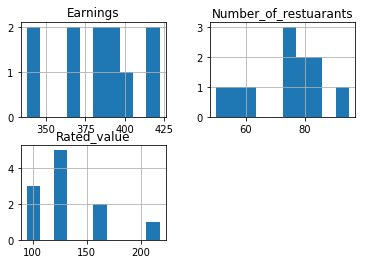

In [137]:
fig = df_merge1[['Earnings', 'Number_of_restuarants', 'Rated_value']]
fig.hist()
plt.show

### Simple Linear Regression

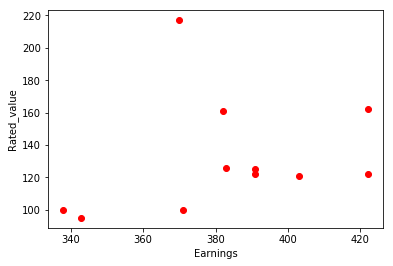

In [139]:
plt.scatter(df_merge1.Earnings, df_merge1.Rated_value, color='red')
plt.xlabel("Earnings")
plt.ylabel("Rated_value")
plt.show()

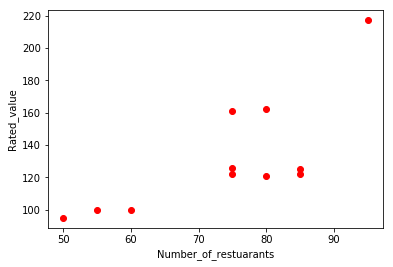

In [141]:
plt.scatter(df_merge1.Number_of_restuarants, df_merge1.Rated_value, color='red')
plt.xlabel("Number_of_restuarants")
plt.ylabel("Rated_value")
plt.show()

Scatter plot shows that there is a liner relationship between restuarants and rated value. As the number of restaurants increases, so do the Rated value. With linear regression you can model the relationship of these variables. A good model can be used to predict what the approximate rated value of the location.

### Train and Test Datasets

None of the datasets contains 2019 data and we need to predict this value using the Simple Linear Regression model. all datasets contains data from 2002-2012 as common.

In [144]:
df_merge1.shape

(11, 3)

In [145]:
msk = np.random.rand(len(df_merge1)) < 0.75
train = df_merge1[msk]
test = df_merge1[~msk]

In [146]:
print(train)

      Earnings  Number_of_restuarants  Rated_value
Year                                              
2002     338.0                     55          100
2003     343.0                     50           95
2007     391.0                     85          122
2008     403.0                     80          121
2009     422.0                     75          122
2011     382.0                     75          161
2012     370.0                     95          217


In [147]:
print(test)

      Earnings  Number_of_restuarants  Rated_value
Year                                              
2004     371.0                     60          100
2005     383.0                     75          126
2006     391.0                     85          125
2010     422.0                     80          162


**Train data distribution**

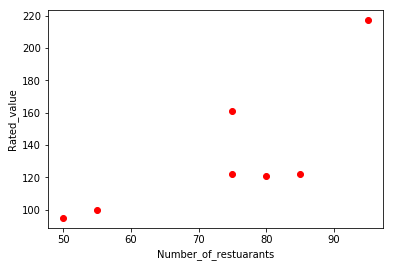

In [149]:
plt.scatter(train.Number_of_restuarants, train.Rated_value,  color='red')
plt.xlabel("Number_of_restuarants")
plt.ylabel("Rated_value")
plt.show()

**Modelling**

In [150]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["Number_of_restuarants"]])
train_y = np.asanyarray(train[["Rated_value"]])
regr.fit (train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[2.03813953]]
Intercept:  [-15.94883721]


**Draw the best fit line (Intercept line) to our train data**

Text(0, 0.5, 'Rated_value')

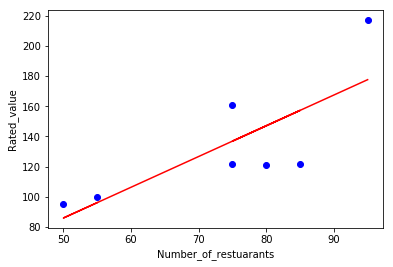

In [151]:
plt.scatter(train.Number_of_restuarants, train.Rated_value,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Number_of_restuarants")
plt.ylabel("Rated_value")

### Conclusion: By seeing the above Scatter Plot with a best possible fit line, the Rated Value in Newham borough for the year 2019 can be predicted somewhere between 180 to 200

### Evaluvation

**There are different model evaluation metrics, here Mean Squared Error (MSE) is used to calculate the accuracy of our model based on the test set.**

1. Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error
2. Mean Squared Error (MSE): It is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors
3. R-squared: It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [152]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['Number_of_restuarants']])
test_y = np.asanyarray(test[['Rated_value']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 16.11
Residual sum of squares (MSE): 356.01
R2-score: 0.02


## Segmenting and Clustering Neighborhoods in London City

In [153]:
import requests 
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# import folium # map rendering library
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [154]:
# install and import folium library 
!pip -q install folium
import folium

### Explore the datasets

#### Read the latitude and longitude coordinates of all Boroughs in London from a Wikipedia link

In [155]:
URL = "https://en.wikipedia.org/wiki/List_of_London_boroughs"
res = requests.get(URL).text
soup = BeautifulSoup(res,'lxml')

df_list = []
# print(soup)
for items in soup.find('table', class_= 'wikitable sortable').find_all('tr')[1::]:
    data = items.find_all(['td'])
    data1 = data[0]
    data8 = data[8]    
    try:
        borough_name = data1.get_text()
        borough_name = borough_name.split('[')
        borough_name = borough_name[0]
        borough_name = borough_name.strip()
        
        ll = data8.get_text()
        ll = ll.split('/')
        lat_long = ll[2]
        lat_long = lat_long.split('(')
        lat_long = lat_long[0]
        lat_long = lat_long.split(';')
        latitude = lat_long[0]
        latitude = latitude.strip()
        longitude = lat_long[1]
        longitude = longitude.strip()
        longitude = longitude.replace(u'\ufeff', '')
        latitude = float(latitude)
        longitude = float(longitude)

#       Append the borough name, latitude and logitude in a list
        df_list.append((borough_name, latitude, longitude))
    except IndexError:pass


In [156]:
df_boroughs = pd.DataFrame(df_list, columns=['Borough', 'Latitude' , 'Longitude'])

In [157]:
df_boroughs.shape

(32, 3)

In [158]:
df_boroughs.head()

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


In [159]:
df_boroughs.dtypes

Borough       object
Latitude     float64
Longitude    float64
dtype: object

In [160]:
df_boroughs.loc[df_boroughs['Borough'] == 'Newham']

,Borough,Latitude,Longitude
23,Newham,51.5077,0.0469


#### Get the Latitude and Longitude of London City using geopy library

In [161]:
address = 'London, UK'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London City are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  from ipykernel import kernelapp as app


The geograpical coordinate of London City are 51.5073219, -0.1276474.


#### Create a map of London with Boroughs superimposed on top

In [162]:
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

In [163]:
for lat, lng, borough in zip(df_boroughs['Latitude'], df_boroughs['Longitude'], df_boroughs['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_london)  

map_london

## Preferred location for Indian restuarant - Newham Borough

**As the Newham borough is having high asian population, it will be consider to Segment and Cluster only the neighbourhoods of this borough. For that we have to get the latitude and longitude details of all the areas(neighbourhoods) of Newham borough**

**Read the latitude and longitude coordinates of all the neighborhoods(areas) in Newham Borough**

In [164]:
from urllib.request import urlopen
import re
URL = "https://en.wikipedia.org/wiki/List_of_areas_of_London"
res = requests.get(URL).text
soup = BeautifulSoup(res,'lxml')

codes = []
areas_list = []
href_links_list = []
for items in soup.find('table', class_= 'wikitable sortable').find_all('tr')[1::]:
    data = items.find_all(['td'])
    data0 = data[0]
    area_name = data0.text

    data1 = data[1]
    data1 = data1.text
    borough = data1.split('[')
    borough_name = borough[0]
    data5 = data[5]
    code = data5.text
    code = code.strip()
    
    if borough_name == 'Newham':
        codes.append(code)
        areas_list.append((borough_name,area_name,code))

                
for link in soup.findAll('a', attrs={'href': re.compile("^https://tools.wmflabs.org")}):
            htext = link.text
            if htext in codes:
                hlink = link.get('href')
                href_links_list.append((htext, hlink))

**Create a DataFrame from the Areas list**

In [165]:
df_areas = pd.DataFrame(areas_list, columns=['Borough', 'Area', 'Code'])

In [166]:
df_areas

,Borough,Area,Code
0,Newham,Beckton,TQ435815
1,Newham,Canning Town,TQ405815
2,Newham,Custom House,TQ408807
3,Newham,East Ham,TQ425835
4,Newham,Forest Gate,TQ405855
5,Newham,Little Ilford,TQ435855
6,Newham,Manor Park,TQ425855
7,Newham,Maryland,TQ391849
8,Newham,North Woolwich,TQ435795
9,Newham,Plaistow,TQ405825


In [167]:
df_areas.columns

Index(['Borough', 'Area', 'Code'], dtype='object')

**Create a DataFrame**

In [168]:
df_links = pd.DataFrame(href_links_list, columns=['Code','href'])

In [169]:
df_links.columns

Index(['Code', 'href'], dtype='object')

In [170]:
df_links

,Code,href
0,TQ435815,https://tools.wmflabs.org/geohack/en/51.514205...
1,TQ405815,https://tools.wmflabs.org/geohack/en/51.514959...
2,TQ408807,https://tools.wmflabs.org/geohack/en/51.507695...
3,TQ425835,https://tools.wmflabs.org/geohack/en/51.532429...
4,TQ405855,https://tools.wmflabs.org/geohack/en/51.550902...
5,TQ435855,https://tools.wmflabs.org/geohack/en/51.550147...
6,TQ425855,https://tools.wmflabs.org/geohack/en/51.550401...
7,TQ391849,https://tools.wmflabs.org/geohack/en/51.545857...
8,TQ435795,https://tools.wmflabs.org/geohack/en/51.496234...
9,TQ405825,https://tools.wmflabs.org/geohack/en/51.523944...


**Merge the Areas and href Links DataFrames**

In [171]:
cols = df_links.columns.difference(df_areas.columns)

In [172]:
df_areas_links = pd.concat([df_areas, df_links[cols]], axis=1)

In [173]:
df_areas_links

,Borough,Area,Code,href
0,Newham,Beckton,TQ435815,https://tools.wmflabs.org/geohack/en/51.514205...
1,Newham,Canning Town,TQ405815,https://tools.wmflabs.org/geohack/en/51.514959...
2,Newham,Custom House,TQ408807,https://tools.wmflabs.org/geohack/en/51.507695...
3,Newham,East Ham,TQ425835,https://tools.wmflabs.org/geohack/en/51.532429...
4,Newham,Forest Gate,TQ405855,https://tools.wmflabs.org/geohack/en/51.550902...
5,Newham,Little Ilford,TQ435855,https://tools.wmflabs.org/geohack/en/51.550147...
6,Newham,Manor Park,TQ425855,https://tools.wmflabs.org/geohack/en/51.550401...
7,Newham,Maryland,TQ391849,https://tools.wmflabs.org/geohack/en/51.545857...
8,Newham,North Woolwich,TQ435795,https://tools.wmflabs.org/geohack/en/51.496234...
9,Newham,Plaistow,TQ405825,https://tools.wmflabs.org/geohack/en/51.523944...


**Remove the row where there is no data**

In [174]:
df_areas_links = df_areas_links.dropna(how='any')
df_areas_links

,Borough,Area,Code,href
0,Newham,Beckton,TQ435815,https://tools.wmflabs.org/geohack/en/51.514205...
1,Newham,Canning Town,TQ405815,https://tools.wmflabs.org/geohack/en/51.514959...
2,Newham,Custom House,TQ408807,https://tools.wmflabs.org/geohack/en/51.507695...
3,Newham,East Ham,TQ425835,https://tools.wmflabs.org/geohack/en/51.532429...
4,Newham,Forest Gate,TQ405855,https://tools.wmflabs.org/geohack/en/51.550902...
5,Newham,Little Ilford,TQ435855,https://tools.wmflabs.org/geohack/en/51.550147...
6,Newham,Manor Park,TQ425855,https://tools.wmflabs.org/geohack/en/51.550401...
7,Newham,Maryland,TQ391849,https://tools.wmflabs.org/geohack/en/51.545857...
8,Newham,North Woolwich,TQ435795,https://tools.wmflabs.org/geohack/en/51.496234...
9,Newham,Plaistow,TQ405825,https://tools.wmflabs.org/geohack/en/51.523944...


**geo co-ordinates for all the areas in the Newham borough**

In [175]:
geo_codes = []
for row in df_areas_links.itertuples():
    url = row.href
    code = row.Code
    res = requests.get(url).text
    soup1 = BeautifulSoup(res,'lxml')
    
    for lat in soup1.find('span',{'class':'latitude'}):
        latitude = lat
        latitude = float(latitude)
            
    for long in soup1.find('span',{'class':'longitude'}):    
        longitude = long
        longitude = float(longitude)
        
    geo_codes.append((code, latitude, longitude))

**DataFrame from the above list**

In [176]:
df_geo_codes = pd.DataFrame(geo_codes, columns=['Code','Latitude','Longitude'])

In [177]:
df_geo_codes.head(10)

,Code,Latitude,Longitude
0,TQ435815,51.514206,0.066634
1,TQ405815,51.514959,0.023429
2,TQ408807,51.507696,0.027431
3,TQ425835,51.532430,0.053041
4,TQ405855,51.550902,0.025024
5,TQ435855,51.550148,0.068263
6,TQ425855,51.550401,0.053850
7,TQ391849,51.545857,0.004608
8,TQ435795,51.496234,0.065821
9,TQ405825,51.523945,0.023828


**merge the Areas(Neighborhoods) and Geocodes DataFrames**

In [178]:
df_areas.columns

Index(['Borough', 'Area', 'Code'], dtype='object')

In [179]:
df_geo_codes.columns

Index(['Code', 'Latitude', 'Longitude'], dtype='object')

In [180]:
cols = df_geo_codes.columns.difference(df_areas.columns)

In [181]:
Newham_borough = pd.concat([df_areas, df_geo_codes[cols]], axis=1)

In [182]:
Newham_borough.head(10)

,Borough,Area,Code,Latitude,Longitude
0,Newham,Beckton,TQ435815,51.514206,0.066634
1,Newham,Canning Town,TQ405815,51.514959,0.023429
2,Newham,Custom House,TQ408807,51.507696,0.027431
3,Newham,East Ham,TQ425835,51.532430,0.053041
4,Newham,Forest Gate,TQ405855,51.550902,0.025024
5,Newham,Little Ilford,TQ435855,51.550148,0.068263
6,Newham,Manor Park,TQ425855,51.550401,0.053850
7,Newham,Maryland,TQ391849,51.545857,0.004608
8,Newham,North Woolwich,TQ435795,51.496234,0.065821
9,Newham,Plaistow,TQ405825,51.523945,0.023828


**Change the name of the column 'Area' to 'Neighborhood**

In [183]:
Newham_borough = Newham_borough.rename(columns={'Area' :'Neighborhood'})

In [184]:
Newham_borough.drop(['Code'], axis=1, inplace=True)

In [185]:
Newham_borough.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,Newham,Beckton,51.514206,0.066634
1,Newham,Canning Town,51.514959,0.023429
2,Newham,Custom House,51.507696,0.027431
3,Newham,East Ham,51.532430,0.053041
4,Newham,Forest Gate,51.550902,0.025024
5,Newham,Little Ilford,51.550148,0.068263
6,Newham,Manor Park,51.550401,0.053850
7,Newham,Maryland,51.545857,0.004608
8,Newham,North Woolwich,51.496234,0.065821
9,Newham,Plaistow,51.523945,0.023828


**Coordinates of Newham Borough**

In [186]:
address = 'Newham, London'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Newham are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Newham are 51.52999955, 0.0293179602938221.


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


**Visualize the Areas(Neighborhoods) of Newham Borough**

In [187]:
map_Newham = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, label in zip(Newham_borough['Latitude'], Newham_borough['Longitude'], Newham_borough['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_Newham)  
    
map_Newham

**explore the first Neighborhood(Area) in Newham Borough**

In [188]:
Newham_borough.columns

Index(['Borough', 'Neighborhood', 'Latitude', 'Longitude'], dtype='object')

In [189]:
Newham_borough.loc[0, 'Neighborhood']

'Beckton'

In [190]:
Newham_borough.loc[0]

Borough           Newham
Neighborhood     Beckton
Latitude         51.5142
Longitude       0.066634
Name: 0, dtype: object

In [191]:
neighborhood_latitude = Newham_borough.loc[0, 'Latitude'] 
neighborhood_longitude = Newham_borough.loc[0, 'Longitude'] 

neighborhood_name = Newham_borough.loc[0, 'Neighborhood'] 

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Beckton are 51.514206, 0.066634.


**Now get the top 50 places of Newham Neighborhood within 500KM radius**

In [193]:
#Getting Venue
CLIENT_ID = '2NEAMVW0X4BNEIAB4HLPKC4CTVOFG3E1Q4CRHQGFYZ2015WO' # your Foursquare ID
CLIENT_SECRET = 'LC0GDIJ4XT0BN43HHEO52UQXNZESXX0JZYXMSJNR304FQPTL' # your Foursquare Secret
VERSION = '20181102'

In [194]:
LIMIT = 50 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret=\
       {}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=2NEAMVW0X4BNEIAB4HLPKC4CTVOFG3E1Q4CRHQGFYZ2015WO&client_secret=       LC0GDIJ4XT0BN43HHEO52UQXNZESXX0JZYXMSJNR304FQPTL&v=20181102&ll=51.514206,0.066634&radius=500&limit=50'

In [195]:
results = requests.get(url).json()

**Categories of the Venues**

In [196]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [197]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

,name,categories,lat,lng
0,East london Gymnastics Club,Gym / Fitness Center,51.514107,0.060155
1,Home Bargains,Discount Store,51.516805,0.062804
2,Lituanica,Grocery Store,51.516442,0.062927
3,Premier Inn London Beckton,Hotel,51.515125,0.061209
4,Matalan,Clothing Store,51.516004,0.062635


In [198]:
nearby_venues.shape

(9, 4)

In [199]:
nearby_venues['name'].value_counts()

Brewers Fayre                  1
Beckton DLR Station            1
Dreams                         1
Lituanica                      1
Matalan                        1
Premier Inn London Beckton     1
Beckton Retail Park            1
Home Bargains                  1
East london Gymnastics Club    1
Name: name, dtype: int64

**how many venues were returned by Foursquare?**

In [200]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

9 venues were returned by Foursquare.


### Explore Neighborhoods in Newham Borough

In [201]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

**create a new dataframe called Newham venues**

In [202]:
Newham_venues = getNearbyVenues(names=Newham_borough['Neighborhood'],
                                   latitudes=Newham_borough['Latitude'],
                                   longitudes=Newham_borough['Longitude']
                                  )

Beckton
Canning Town
Custom House
East Ham
Forest Gate
Little Ilford
Manor Park
Maryland
North Woolwich
Plaistow
Silvertown
Stratford
Upton Park
West Ham


In [203]:
Newham_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Beckton,51.514206,0.066634,East london Gymnastics Club,51.514107,0.060155,Gym / Fitness Center
1,Beckton,51.514206,0.066634,Home Bargains,51.516805,0.062804,Discount Store
2,Beckton,51.514206,0.066634,Lituanica,51.516442,0.062927,Grocery Store
3,Beckton,51.514206,0.066634,Premier Inn London Beckton,51.515125,0.061209,Hotel
4,Beckton,51.514206,0.066634,Matalan,51.516004,0.062635,Clothing Store
5,Beckton,51.514206,0.066634,Beckton DLR Station,51.514365,0.061460,Light Rail Station
6,Beckton,51.514206,0.066634,Dreams,51.516367,0.062710,Furniture / Home Store
7,Beckton,51.514206,0.066634,Beckton Retail Park,51.517122,0.062234,Shopping Plaza
8,Beckton,51.514206,0.066634,Brewers Fayre,51.514812,0.060861,Pub
9,Canning Town,51.514959,0.023429,BP,51.516999,0.023454,Gas Station


**Number of venues were returned for each neighborhood**

In [204]:
Newham_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Beckton,9,9,9,9,9,9
Canning Town,4,4,4,4,4,4
Custom House,25,25,25,25,25,25
East Ham,14,14,14,14,14,14
Forest Gate,13,13,13,13,13,13
Little Ilford,5,5,5,5,5,5
Manor Park,4,4,4,4,4,4
Maryland,25,25,25,25,25,25
North Woolwich,23,23,23,23,23,23


**Number of unique categories**

In [206]:
print('There are {} uniques categories.'.format(len(Newham_venues['Venue Category'].unique())))

There are 94 uniques categories.


### Analyze Each Neighborhood in Newham borough

In [207]:
Newham_onehot = pd.get_dummies(Newham_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Newham_onehot['Neighborhood'] = Newham_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Newham_onehot.columns[-1]] + list(Newham_onehot.columns[:-1])
Newham_onehot = Newham_onehot[fixed_columns]

Newham_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,Art Gallery,Asian Restaurant,Bakery,Bar,Boat or Ferry,Bookstore,Boutique,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Bus Stop,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Food Court,Fountain,Fried Chicken Joint,Furniture / Home Store,Gas Station,General Entertainment,German Restaurant,Go Kart Track,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hotel,Hotel Bar,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Italian Restaurant,Juice Bar,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Movie Theater,Moving Target,Multiplex,Paintball Field,Park,Pharmacy,Pier,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Restaurant,River,Sandwich Place,Scenic Lookout,Shoe Store,Shopping Mall,Shopping Plaza,Steakhouse,Supermarket,Tapas Restaurant,Thai Restaurant,Theater,Toy / Game Store,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Warehouse Store,Wine Bar
0,Beckton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Beckton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Beckton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Beckton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Beckton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [208]:
Newham_grouped = Newham_onehot.groupby('Neighborhood').mean().reset_index()
Newham_grouped

,Neighborhood,Accessories Store,African Restaurant,Art Gallery,Asian Restaurant,Bakery,Bar,Boat or Ferry,Bookstore,Boutique,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Bus Stop,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Food Court,Fountain,Fried Chicken Joint,Furniture / Home Store,Gas Station,General Entertainment,German Restaurant,Go Kart Track,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hotel,Hotel Bar,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Italian Restaurant,Juice Bar,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Movie Theater,Moving Target,Multiplex,Paintball Field,Park,Pharmacy,Pier,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Restaurant,River,Sandwich Place,Scenic Lookout,Shoe Store,Shopping Mall,Shopping Plaza,Steakhouse,Supermarket,Tapas Restaurant,Thai Restaurant,Theater,Toy / Game Store,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Warehouse Store,Wine Bar
0,Beckton,0.00,0.000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.0,0.00,0.00,0.00,0.00,0.000,0.000000,0.000000,0.111111,0.000000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.111111,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.111111,0.00,0.00,0.00,0.000,0.111111,0.00,0.111111,0.000000,0.111111,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.111111,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.111111,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.111111,0.000000,0.000000,0.00,0.00,0.000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00
1,Canning Town,0.00,0.000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.0,0.00,0.00,0.00,0.00,0.000,0.250000,0.000000,0.000000,0.000000,0.000,0.25,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.25,0.00,0.00,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000,0.250000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00
2,Custom House,0.00,0.000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.0,0.00,0.04,0.00,0.00,0.000,0.040000,0.040000,0.000000,0.080000,0.000,0.04,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.00,0.00,0.00,0.000,0.000000,0.08,0.000000,0.000000,0.200000,0.04,0.00,0.00,0.000000,0.00,0.00,0.000000,0.040000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.080000,0.04,0.000000,0.080000,0.04,0.000000,0.00,0.000000,0.040000,0.000000,0.04,0.00,0.000,0.00,0.000000,0.000000,0.00,0.04,0.00,0.000000,0.04
3,East Ham,0.00,0.000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.0,0.00,0.00,0.00,0.00,0.000,0.000000,0.071429,0.071429,0.071429,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.071429,0.071429,0.000000,0.00,0.000000,0.0,0.000000,0.00,0.00,0.00,0.000,0.071429,0.00,0.000000,0.071429,0.000000,0.00,0.00,0.00,0.071429,0.00,0.00,0.071429,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000,0.071429,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.071429,0.00,0.000000,0.071429,0.00,0.000000,0.00,0.000000,0.000000,0.071429,0.00,0.00,0.000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.071429,0.00
4,Forest Gate,0.00,0.000,0.00,0.0,0.076923,0.00,0.000000,0.00,0.0,0.00,0.00,0.00,0.00,0.000,0.076923,0.076923,0.000000,0.000000,0.000

**each neighborhood along with the top 5 most common venues**

In [209]:
num_top_venues = 5
for hood in Newham_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Newham_grouped[Newham_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Beckton----
                venue  freq
0      Discount Store  0.11
1      Clothing Store  0.11
2  Light Rail Station  0.11
3                 Pub  0.11
4               Hotel  0.11


----Canning Town----
               venue  freq
0        Gas Station  0.25
1               Park  0.25
2  Convenience Store  0.25
3               Café  0.25
4  Accessories Store  0.00


----Custom House----
            venue  freq
0           Hotel  0.20
1             Gym  0.08
2             Pub  0.08
3  Sandwich Place  0.08
4     Coffee Shop  0.08


----East Ham----
               venue  freq
0  Indian Restaurant  0.07
1        Supermarket  0.07
2           Gym Pool  0.07
3      Grocery Store  0.07
4               Park  0.07


----Forest Gate----
               venue  freq
0      Grocery Store  0.23
1             Market  0.08
2  Fish & Chips Shop  0.08
3                Pub  0.08
4      Moving Target  0.08


----Little Ilford----
                 venue  freq
0    Indian Restaurant   0.2
1     Asian Resta

**Sort the venues in descending order**

In [210]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**display the top 10 venues for each neighborhood**

In [211]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Newham_grouped['Neighborhood']

for ind in np.arange(Newham_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Newham_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beckton,Hotel,Discount Store,Gym / Fitness Center,Grocery Store,Pub,Light Rail Station,Clothing Store,Furniture / Home Store,Shopping Plaza,Food Court
1,Canning Town,Park,Convenience Store,Café,Gas Station,Wine Bar,Fountain,Donut Shop,Eastern European Restaurant,Electronics Store,Fast Food Restaurant
2,Custom House,Hotel,Gym,Coffee Shop,Pub,Sandwich Place,Bridge,Hotel Bar,Italian Restaurant,Convenience Store,Chinese Restaurant
3,East Ham,Gym Pool,Sandwich Place,Clothing Store,Pub,Coffee Shop,Fast Food Restaurant,Supermarket,Electronics Store,Chinese Restaurant,Indoor Play Area
4,Forest Gate,Grocery Store,Market,Moving Target,Bakery,Train Station,Miscellaneous Shop,Pub,Fast Food Restaurant,Fish & Chips Shop,Chinese Restaurant
5,Little Ilford,Ice Cream Shop,Asian Restaurant,Grocery Store,Fried Chicken Joint,Indian Restaurant,Bakery,Gas Station,Eastern European Restaurant,Electronics Store,Fast Food Restaurant
6,Manor Park,Turkish Restaurant,Gym / Fitness Center,Restaurant,Gas Station,Wine Bar,Fountain,Diner,Discount Store,Donut Shop,Eastern European Restaurant
7,Maryland,Hotel,Pub,Grocery Store,Café,Supermarket,Dance Studio,Eastern European Restaurant,Portuguese Restaurant,Liquor Store,Bus Stop
8,North Woolwich,Pier,Clothing Store,Hotel,Steakhouse,Pub,Italian Restaurant,River,Sandwich Place,Pharmacy,Shoe Store
9,Plaistow,Park,African Restaurant,Indian Restaurant,Gym / Fitness Center,Grocery Store,Pub,Bus Stop,Café,Fountain,Discount Store


### Cluster the Neighborhoods

**K-means algorithm to cluster the neighborhood into 5 clusters**

In [212]:
# set number of clusters
kclusters = 5

Newham_grouped_clustering = Newham_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Newham_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 2, 2, 2, 3, 4, 2, 2, 0], dtype=int32)

**create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood**

In [213]:
Newham_merged = Newham_borough

# add clustering labels
Newham_merged['Cluster Labels'] = kmeans.labels_

# merge Neighborhoods dataframe with Newham borough dataframe to add latitude/longitude for each neighborhood
Newham_merged = Newham_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Newham_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Newham,Beckton,51.514206,0.066634,2,Hotel,Discount Store,Gym / Fitness Center,Grocery Store,Pub,Light Rail Station,Clothing Store,Furniture / Home Store,Shopping Plaza,Food Court
1,Newham,Canning Town,51.514959,0.023429,0,Park,Convenience Store,Café,Gas Station,Wine Bar,Fountain,Donut Shop,Eastern European Restaurant,Electronics Store,Fast Food Restaurant
2,Newham,Custom House,51.507696,0.027431,2,Hotel,Gym,Coffee Shop,Pub,Sandwich Place,Bridge,Hotel Bar,Italian Restaurant,Convenience Store,Chinese Restaurant
3,Newham,East Ham,51.532430,0.053041,2,Gym Pool,Sandwich Place,Clothing Store,Pub,Coffee Shop,Fast Food Restaurant,Supermarket,Electronics Store,Chinese Restaurant,Indoor Play Area
4,Newham,Forest Gate,51.550902,0.025024,2,Grocery Store,Market,Moving Target,Bakery,Train Station,Miscellaneous Shop,Pub,Fast Food Restaurant,Fish & Chips Shop,Chinese Restaurant


**Visualize the Cluster**

In [215]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Newham_merged['Latitude'], Newham_merged['Longitude'], Newham_merged['Neighborhood'], Newham_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Examine the Clusters**

In [216]:
Newham_merged.loc[Newham_merged['Cluster Labels'] == 0, Newham_merged.columns[[1] + list(range(5, Newham_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Canning Town,Park,Convenience Store,Café,Gas Station,Wine Bar,Fountain,Donut Shop,Eastern European Restaurant,Electronics Store,Fast Food Restaurant
9,Plaistow,Park,African Restaurant,Indian Restaurant,Gym / Fitness Center,Grocery Store,Pub,Bus Stop,Café,Fountain,Discount Store


In [217]:
Newham_merged.loc[Newham_merged['Cluster Labels'] == 1, Newham_merged.columns[[1] + list(range(5, Newham_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Upton Park,Convenience Store,Bus Stop,Bookstore,Boutique,Wine Bar,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Food Court
13,West Ham,Convenience Store,Bus Stop,Bookstore,Boutique,Wine Bar,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Food Court


In [218]:
Newham_merged.loc[Newham_merged['Cluster Labels'] == 2, Newham_merged.columns[[1] + list(range(5, Newham_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beckton,Hotel,Discount Store,Gym / Fitness Center,Grocery Store,Pub,Light Rail Station,Clothing Store,Furniture / Home Store,Shopping Plaza,Food Court
2,Custom House,Hotel,Gym,Coffee Shop,Pub,Sandwich Place,Bridge,Hotel Bar,Italian Restaurant,Convenience Store,Chinese Restaurant
3,East Ham,Gym Pool,Sandwich Place,Clothing Store,Pub,Coffee Shop,Fast Food Restaurant,Supermarket,Electronics Store,Chinese Restaurant,Indoor Play Area
4,Forest Gate,Grocery Store,Market,Moving Target,Bakery,Train Station,Miscellaneous Shop,Pub,Fast Food Restaurant,Fish & Chips Shop,Chinese Restaurant
7,Maryland,Hotel,Pub,Grocery Store,Café,Supermarket,Dance Studio,Eastern European Restaurant,Portuguese Restaurant,Liquor Store,Bus Stop
8,North Woolwich,Pier,Clothing Store,Hotel,Steakhouse,Pub,Italian Restaurant,River,Sandwich Place,Pharmacy,Shoe Store
10,Silvertown,Park,Paintball Field,Gym / Fitness Center,Go Kart Track,Italian Restaurant,Theater,Construction & Landscaping,Café,Food Court,Discount Store
11,Stratford,Clothing Store,Burger Joint,Sandwich Place,Hotel,Italian Restaurant,Toy / Game Store,Department Store,Cosmetics Shop,Grocery Store,Gym / Fitness Center


In [219]:
Newham_merged.loc[Newham_merged['Cluster Labels'] == 3, Newham_merged.columns[[1] + list(range(5, Newham_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Little Ilford,Ice Cream Shop,Asian Restaurant,Grocery Store,Fried Chicken Joint,Indian Restaurant,Bakery,Gas Station,Eastern European Restaurant,Electronics Store,Fast Food Restaurant


In [220]:
Newham_merged.loc[Newham_merged['Cluster Labels'] == 4, Newham_merged.columns[[1] + list(range(5, Newham_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Manor Park,Turkish Restaurant,Gym / Fitness Center,Restaurant,Gas Station,Wine Bar,Fountain,Diner,Discount Store,Donut Shop,Eastern European Restaurant


### Conclusion

**According to the above data the best place to open an Indian restuarant (based on 1st most common venue data): Manor Park, Beckston, Maryland, Custom House and Plaistow. This area also high population of Asians including Indians. It wll be a good idea to start restuarant here.**